In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
men=Memory("./mycache")

In [143]:
#定义读取数据函数
def get_data():
    data=load_svmlight_file('./housing_scale')
    return data[0].todense(),data[1]

In [144]:
#读取数据
X,y=get_data()
#将Y转为n*1的列向量
y=np.reshape(y,(len(y),1))

In [145]:
#切分训练集和测试集
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.3,random_state=42)#分割数据集
#获取训练集的横纵维度
(n,m)=np.shape(X_train)
#为训练集加入一列，作为bias列
X_train=np.hstack((X_train,np.ones((n,1))))
#获取训练集的横纵维度
(n,m)=np.shape(X_valid)
#测试集加入一列，作为bias列
X_valid=np.hstack((X_valid,np.ones((n,1))))

In [146]:
def squareloss(X,w,y):    #loss函数使用平方差损失韩式 sum(x-y)^2/((2n)
    y_predict=X*w         #预测结果
    s=y_predict-y         #预测值和真实值差值
    result=np.square(s)   #对插值进行平方
    return np.sum(result)/(2*len(y))

squareloss的公式为:
$$L=\frac{1}{2n}\sum_{i=1}^{n}(y_i-y)^2$$

In [147]:

def gradient(X,w,y,lam=0):     #梯度算法 lam为正则化参数,默认设置为0
    grad=lam*w+X.T*(X*w-y)    #根据梯度公式求得
    return grad


梯度公式为:
   $$gradient=X^T(XW-y)$$

In [148]:
#定义梯度下降函数
def LinearRegression(X,y,w,lamda,epco,eta,gradient=gradient,loss=squareloss):
    grad=0
    loss_train=[]
    loss_test=[]
    #for循环内开始梯度下降
    for i in range(epco):
        grad=gradient(X,w,y,lamda)            #获得新的梯度
        w=w-eta*grad                            #梯度下降公式
        loss_train.append(loss(X,w,y))   #计算训练误差
        loss_test.append(loss(X_valid,w,y_valid))      #计算测试误差
    return loss_train,loss_test

梯度下降公式：
    $$W_t=W_{t-1}-\eta \frac {\partial J}{\partial w}$$

In [155]:
#获取权重函数
(n,m)=np.shape(X_valid)
#定义权重矩阵，维度为(m+1)*1
w=np.zeros((m,1))

#定义迭代次数
epco=1000                
times=range(epco)   

loss_train=[]             #训练集误差
loss_test=[]              #测试集误差
eta=0.001                   #学习率


In [156]:
loss_train,loss_test=LinearRegression(X=X_train,y=y_train,w=w,eta=eta,lamda=0,epco=epco)
#显示最后的loss
print(loss_train[-1])
print(loss_test[-1])

11.2727693277
10.7634155621


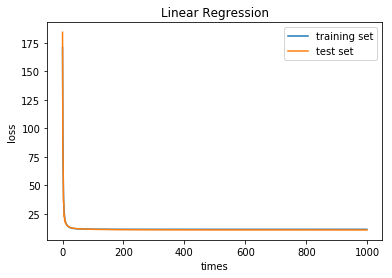

In [157]:
plt.xlabel('times')
plt.ylabel('loss')
plt.title("Linear Regression")
plt.plot(times,loss_train,label='training set')
plt.plot(times,loss_test,label='test set')
plt.legend()
plt.show()